In [1]:
# Import Required packages
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

In [2]:
#Read Csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train,1.0


In [13]:
df.shape

(1309, 13)

In [14]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [15]:
#check unique values of each column
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('------------')

PassengerId
[892 893 894 ... 889 890 891]
------------
Pclass
[3 2 1]
------------
Name
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' ...
 'Johnston, Miss. Catherine Helen "Carrie"' 'Behr, Mr. Karl Howell'
 'Dooley, Mr. Patrick']
------------
Sex
['male' 'female']
------------
Age
[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5   4.   66.   65.   11.
 71.   70.5  55.5  56.   45.5  20.5  52.   23.5  80.   70.   24.5   0.67
 30.5   0.42 74.  ]
------------
SibSp
[0 1 2 3 4 5 8]
------------
Parch
[0 1 3 2 4 6 5 9]
------------
Ticke

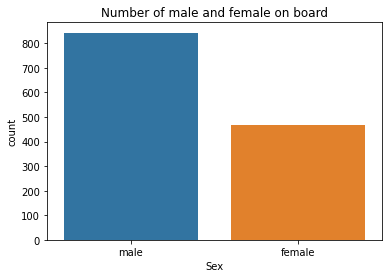

In [16]:
sns.countplot(df['Sex'])
plt.title('Number of male and female on board')
plt.show()

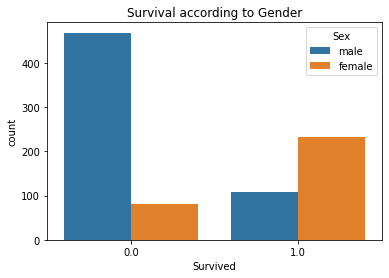

In [17]:
sns.countplot(x='Survived', data= df, hue='Sex')
plt.title("Survival according to Gender")
plt.show()

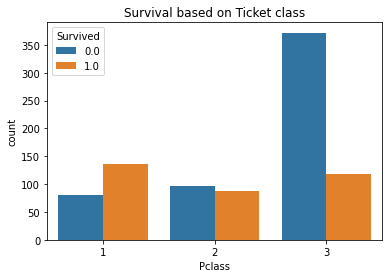

In [18]:
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Survival based on Ticket class')
plt.show()

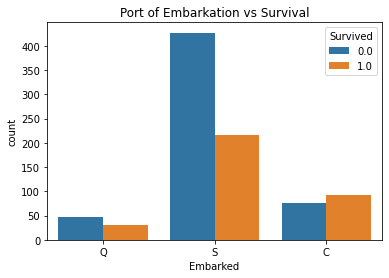

In [19]:
sns.countplot(x='Embarked', data=df, hue='Survived')
plt.title('Port of Embarkation vs Survival')
plt.show()

## Preprocessing and Modelling

<AxesSubplot:>

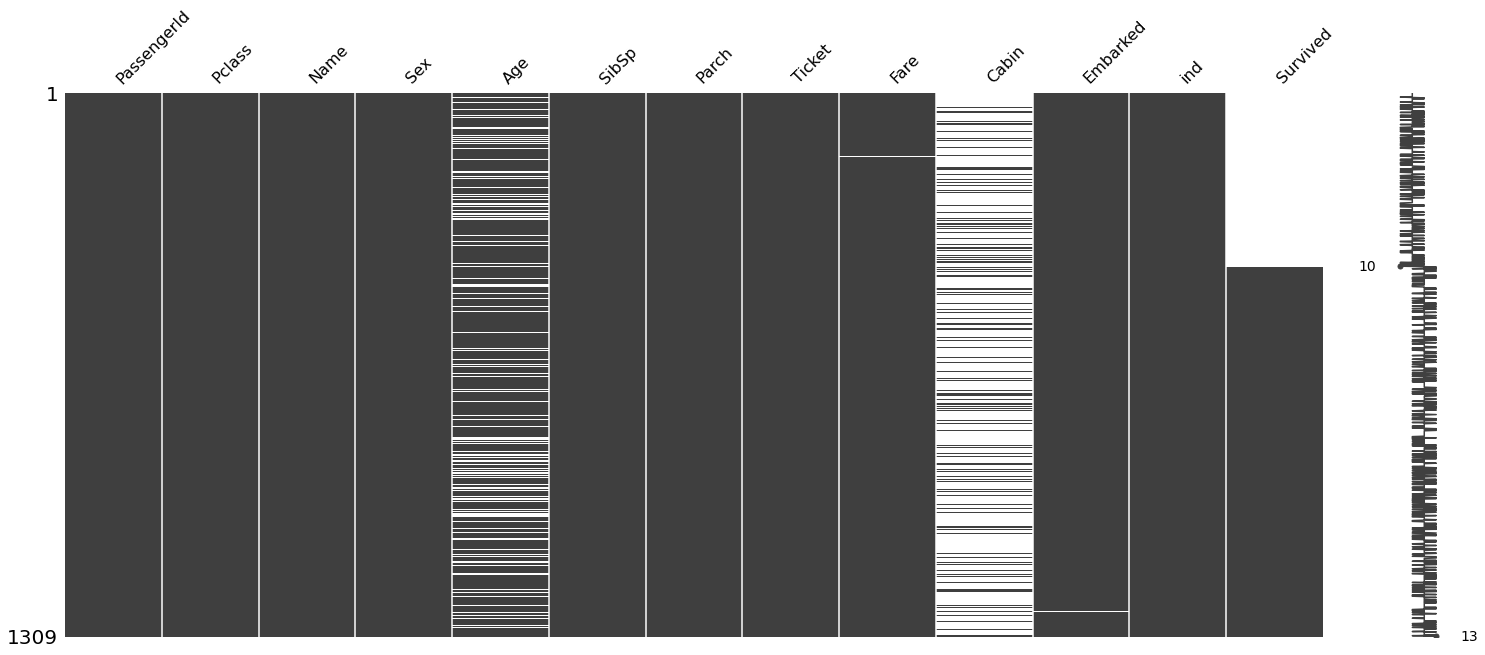

In [20]:
msno.matrix(df)

In [21]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
ind               0
Survived        418
dtype: int64

In [22]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [23]:
df[df['Age']==0.17]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S,test,NaN


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

np.random.seed(42)

In [25]:
#split data
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [26]:
train = train.drop('ind', axis=1)

In [27]:
X = train.drop(['Survived', 'Cabin'], axis=1)
y= train.Survived

In [28]:
test = test.drop(['Cabin'], axis=1)

In [29]:
test = test.drop('ind', axis=1)

In [30]:
to_encode = ['Name', 'Sex', 'Ticket', 'Embarked']
for feat in to_encode:
    le = LabelEncoder()
    X[feat] = le.fit_transform(X[feat])
    test[feat] = le.fit_transform(test[feat])

In [31]:
Imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
X = Imputer.fit_transform(X)
test = Imputer.fit_transform(test)

In [32]:
param_grid = {'C':np.arange(0.001, 1, 0.01)}

In [33]:
cv = GridSearchCV(LogisticRegression(), param_grid= param_grid, cv= 5)

In [34]:
model = cv.fit(X,y)

In [35]:
model.best_score_, model.best_params_

(0.7811813445483649, {'C': 0.43099999999999994})

In [36]:
predicted = model.predict(test).astype('int')

In [38]:
#output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predicted})
#output.to_csv('my_submission.csv', index= False)

In [39]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
output = pd.DataFrame({'PassengerId': submission.PassengerId, 'Survived': predicted})
output.to_csv('my_submission2.csv', index= False)

In [41]:
output.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Random forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X, y)
rfc_predicted = rfc.predict(test)
rfc_predicted.astype('int')

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
output = pd.DataFrame({'PassengerId': submission.PassengerId, 'Survived': rfc_predicted.astype('int')})
output.to_csv('rfc.csv', index= False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [44]:
#rfc and grid search
parameter_grid = {
                 'max_depth' : [2,4, 6, 8, 10],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }


grid_search = GridSearchCV(rfc, parameter_grid, cv=5)
grid_search.fit(X,y)
grid_search.best_score_, grid_search.best_params_

(0.839539263071998,
 {'bootstrap': False,
  'max_depth': 8,
  'max_features': 'auto',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 50})

In [45]:
parameter = grid_search.best_params_
rfc_model = RandomForestClassifier(**parameter)
rfc_model.fit(X, y)
rfc_predicted = rfc_model.predict(test)
rfc_predicted.astype('int')

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
output = pd.DataFrame({'PassengerId': submission.PassengerId, 'Survived': rfc_predicted.astype('int')})
output.to_csv('rfc_gs.csv', index= False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [50]:
rfc_model.fit(X_train, y_train)
rfc_predicted = rfc_model.predict(X_test)

In [52]:
#check acccuracy score
auc_score = accuracy_score(y_test, rfc_predicted)
auc_score

0.7982062780269058

In [56]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       137
         1.0       0.75      0.71      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, rfc_predicted))

[[117  20]
 [ 25  61]]


In [58]:
rfc_output = rfc_model.predict(test)
output = pd.DataFrame({'PassengerId': submission.PassengerId, 'Survived': rfc_output.astype('int')})
output.to_csv('rfc_gs_2.csv', index= False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## Logistic regression

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X,y)
log_reg_pred = log_reg.predict(test)

In [60]:
output = pd.DataFrame({'PassengerId': submission.PassengerId, 'Survived': log_reg_pred.astype('int')})
output.to_csv('log_reg.csv', index= False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [64]:
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

#classification report
print(classification_report(y_test, log_reg_pred))

print('-'*10)      
      
#confusion matrix
print(confusion_matrix(y_test, log_reg_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       137
         1.0       0.69      0.59      0.64        86

    accuracy                           0.74       223
   macro avg       0.73      0.71      0.72       223
weighted avg       0.74      0.74      0.74       223

----------
[[114  23]
 [ 35  51]]


In [67]:
log_reg_pred = log_reg.predict(test)
output = pd.DataFrame({'PassengerId': submission.PassengerId, 'Survived': log_reg_pred.astype('int')})
output.to_csv('log_reg_2.csv', index= False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
